## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_row',None)

by using above command we can display all rows 

In [3]:
loan=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\loan_prediction.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

this dataset have 614 rows and 13 columns

In [5]:
loan=loan.drop(columns=['Loan_ID'],axis=1)

Here we drop 'Loan_ID' column, as it is not usefull

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


info().method give total non null count and Datatype of columns, here we have total 7 object means categorical data, 4 float type column and 1 integer data

In [7]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

here we get exact null count of our dataset,  most of columns contains null value, below we use Handling missing value technique

# Handling missing Values

In [8]:
loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['LoanAmount']=loan['LoanAmount'].replace(np.nan,loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].replace(np.nan,loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].replace(np.nan,loan['Credit_History'].mean())

column "Gender",'Married','Dependents','Self_Employed' are categorical columns so we use mode method to replace null value, [0] denotes index of mode value, the columns 'LoanAmount','Loan_Amount_Term','Credit_History' are continous data type columns , so we use mean method to replace the null values

In [9]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see that null values are replaced all, now we have 0 null values

In [10]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


describe() method give statistical analysis of numerical coulmns only,it denotes, 25 % means first qaurtile, 50% means second quartile and 75% means third quartile and also give mean, standard deviation  and minimum and maximum count of each row

# Univariate Analysis 

In [11]:
loan['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

feature "gender" has two class 'Male' and "Female"

<AxesSubplot:xlabel='Gender', ylabel='count'>

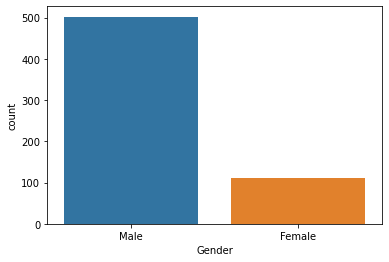

In [12]:
sns.countplot(loan['Gender'])

we get count plot for gender

In [13]:
loan['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Total 401 is married and 213 is not married

<AxesSubplot:xlabel='Married', ylabel='count'>

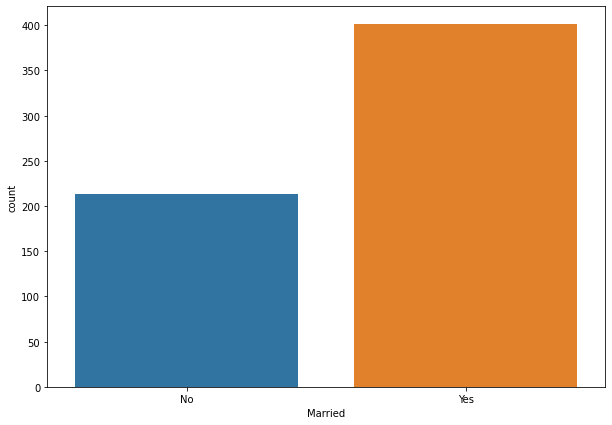

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Married'])

In [15]:
loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

column "Dependents" has total 4 class ,0 denotes no dependant ,3+ denotes more than 3 people depends on borrower

<AxesSubplot:xlabel='Dependents', ylabel='count'>

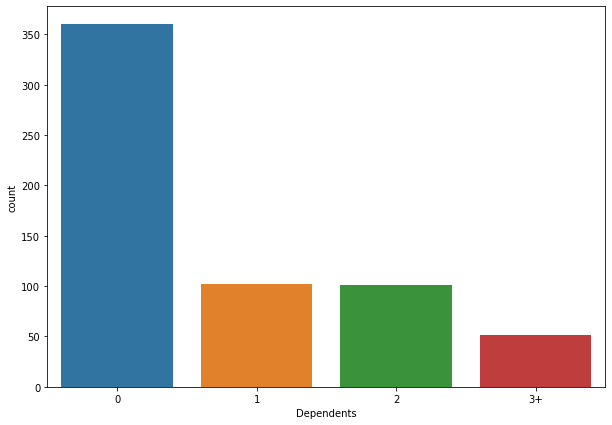

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Dependents'])

In [17]:
loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

total 480 people are graduate and 134 are non graduate

<AxesSubplot:xlabel='Education', ylabel='count'>

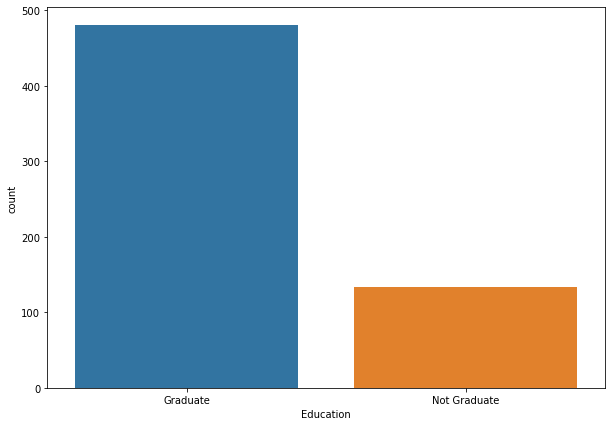

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Education'])

In [19]:
loan['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

total 532 are not self employed and 82 are employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

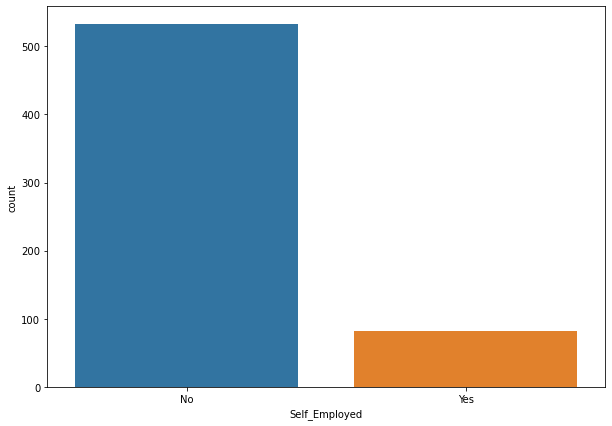

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Self_Employed'])

In [21]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

total 3 class are present in "Property_Area" 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

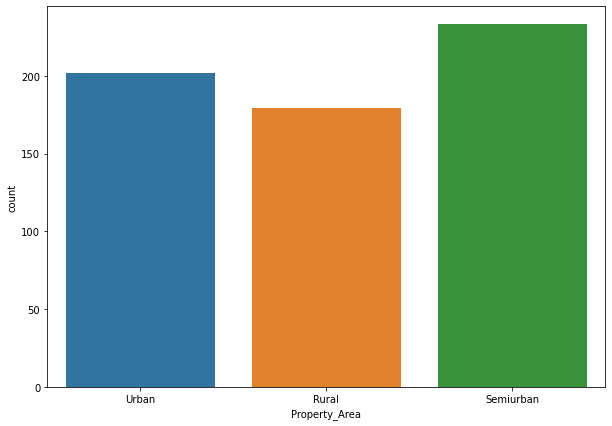

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Property_Area'])

In [23]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

This is our lable, total 422 people get loan and  192 people hasnt get loan

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

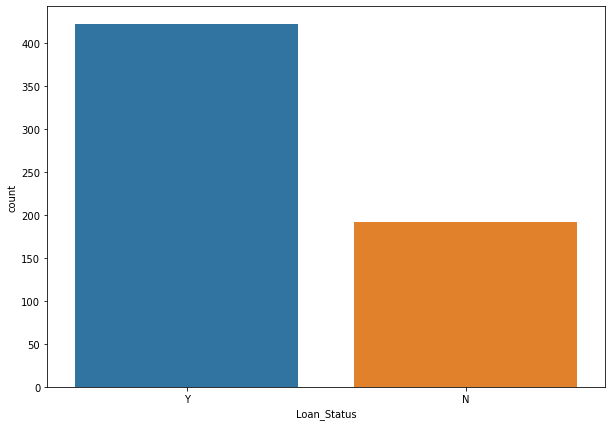

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(loan['Loan_Status'])

## By observing label "Loan_Status" we can conclude that  our problem is Classification type

# Encoding Techniques

In [25]:
from sklearn.preprocessing import LabelEncoder
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
loan[cat]=loan[cat].apply(le.fit_transform)

Label encoding assign the number from 0 to n-1, where n is length of class. here we pass all categorical column into label encoder, to get all numerical columns

In [26]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


here we can see that , all categorical columns are have numerical values now

In [27]:
loan['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

feature 'Credit_History' has 3 values, but we consider this feature as continus feature because float data is there

In [28]:
loan['ApplicantIncome'].value_counts()

2500     9
4583     6
2600     6
6000     6
5000     5
4166     5
3333     5
3750     5
2400     4
8333     4
2583     4
6250     4
3500     3
5417     3
3000     3
2333     3
10000    3
3166     3
3167     3
4000     3
4333     3
3400     3
4750     2
3173     2
4300     2
5500     2
3510     2
3717     2
2917     2
3466     2
9323     2
3667     2
2479     2
1025     2
3418     2
1820     2
3200     2
7333     2
5746     2
3859     2
1958     2
2666     2
5703     2
12000    2
3159     2
8750     2
2833     2
3083     2
2014     2
2213     2
2083     2
5250     2
6400     2
4652     2
4283     2
2383     2
1800     2
2378     2
14583    2
2947     2
9538     1
3357     1
3366     1
3365     1
9508     1
2130     1
7441     1
3326     1
4384     1
3430     1
5488     1
3358     1
4467     1
8566     1
2346     1
9560     1
4400     1
3399     1
6500     1
3427     1
3406     1
16692    1
3410     1
20833    1
81000    1
5468     1
2395     1
4408     1
3417     1
2366     1
4416     1

In [29]:
loan['ApplicantIncome'].nunique()

505

In [30]:
loan['CoapplicantIncome'].value_counts()

0.000000        273
1666.000000       5
2083.000000       5
2500.000000       5
1750.000000       3
1459.000000       3
2333.000000       3
1800.000000       3
1625.000000       3
2250.000000       3
5625.000000       3
2451.000000       2
1640.000000       2
2917.000000       2
1560.000000       2
20000.000000      2
1717.000000       2
1950.000000       2
1843.000000       2
2569.000000       2
3750.000000       2
4167.000000       2
3500.000000       2
2925.000000       2
1300.000000       2
1430.000000       2
754.000000        2
3167.000000       2
1667.000000       2
4416.000000       2
1917.000000       2
2054.000000       2
1250.000000       2
2167.000000       2
1833.000000       2
2531.000000       2
2000.000000       2
3000.000000       2
1451.000000       2
4750.000000       2
5624.000000       1
2306.000000       1
1260.000000       1
1842.000000       1
1851.000000       1
1590.000000       1
2383.000000       1
2598.000000       1
1820.000000       1
3428.000000       1


In [31]:
loan['CoapplicantIncome'].nunique()

287

In [32]:
loan['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
187.000000    12
113.000000    11
128.000000    11
130.000000    10
96.000000      9
95.000000      9
70.000000      8
115.000000     8
112.000000     8
135.000000     7
150.000000     7
136.000000     7
132.000000     7
125.000000     7
104.000000     7
80.000000      6
81.000000      6
138.000000     6
90.000000      6
158.000000     6
116.000000     6
175.000000     6
144.000000     6
155.000000     6
180.000000     6
152.000000     5
124.000000     5
133.000000     5
200.000000     5
71.000000      5
140.000000     5
111.000000     5
185.000000     5
108.000000     5
88.000000      4
60.000000      4
123.000000     4
55.000000      4
66.000000      4
84.000000      4
98.000000      4
122.000000     4
182.000000     4
134.000000     4
94.000000      4
99.000000      4
50.000000      4
126.000000     4
172.000000     4
105.000000     4
131.000000     4
137.000000     4
151.000000     4
170.000000    

In [33]:
loan['LoanAmount'].nunique()

204

In [34]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
loan['Loan_Amount_Term'].nunique()

11

now we will use distplot to see distribution of all columns,which univariate analysis

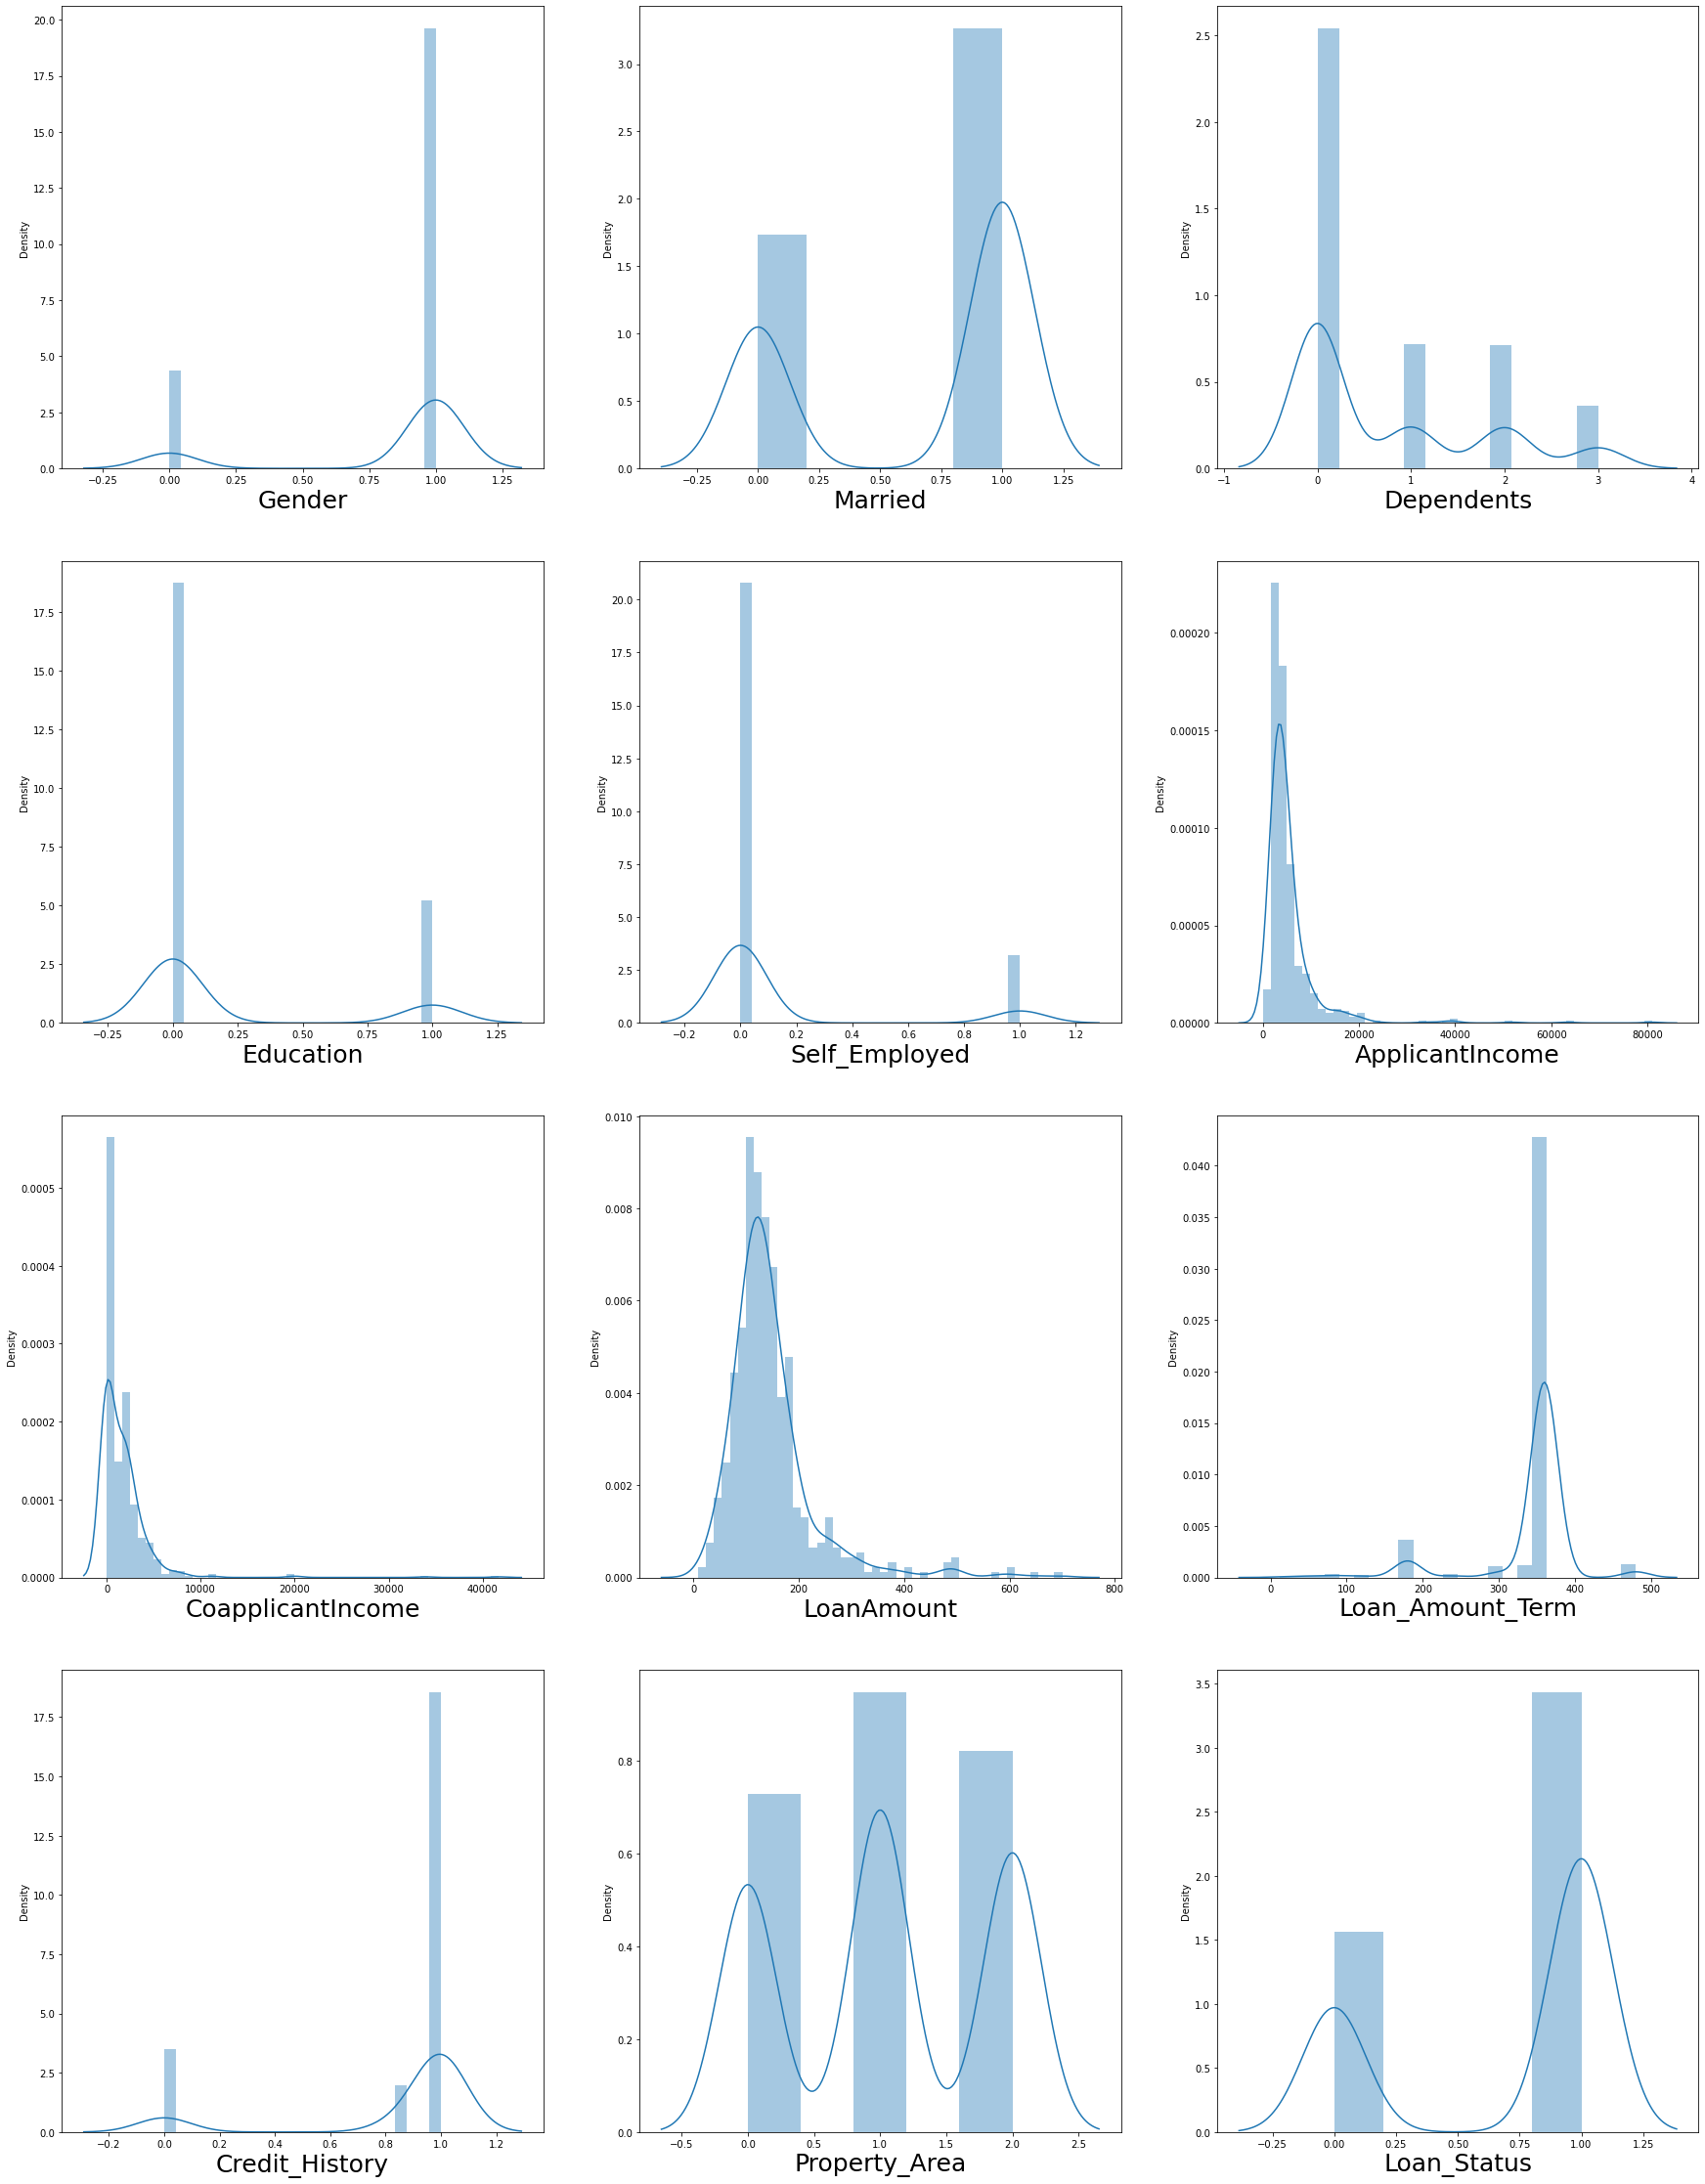

In [36]:
plt.figure(figsize=(30,40))# 30 represnt row dimension and 40 represents column dimension
plotnumber=1 # initially plotnumber is set to1
for column in loan:  # pass every column in for loop
    if plotnumber<=12:   # maximum value for plotnumber is set to 15, generallay it is equal to number of columns in dataframe
        plt.subplot(4,3,plotnumber)  # we draw,subplot in 3 rows and 3 columns
        sns.distplot(loan[column]) # draw distplot for each column
        plt.xlabel(column,fontsize=25)  # assign label to x axis which is column name
    plotnumber+=1 # increment the plotnumber after every iteration
plt.show()# display the plot

Generally normal distribution is used for continous data only, we focus on continous feature like 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History', the mentioned columns shows lot of skewsness,  so we must use outlier removal method as well as skewness removal methods 

Gender                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Married              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Dependents            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Self_Employed        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
ApplicantIncome         AxesSubplot(0.125,0.593621;0.133621x0.130172)
CoapplicantIncome    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
LoanAmount            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Loan_Amount_Term     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Credit_History       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Property_Area           AxesSubplot(0.125,0.437414;0.133621x0.130172)
Loan_Status          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

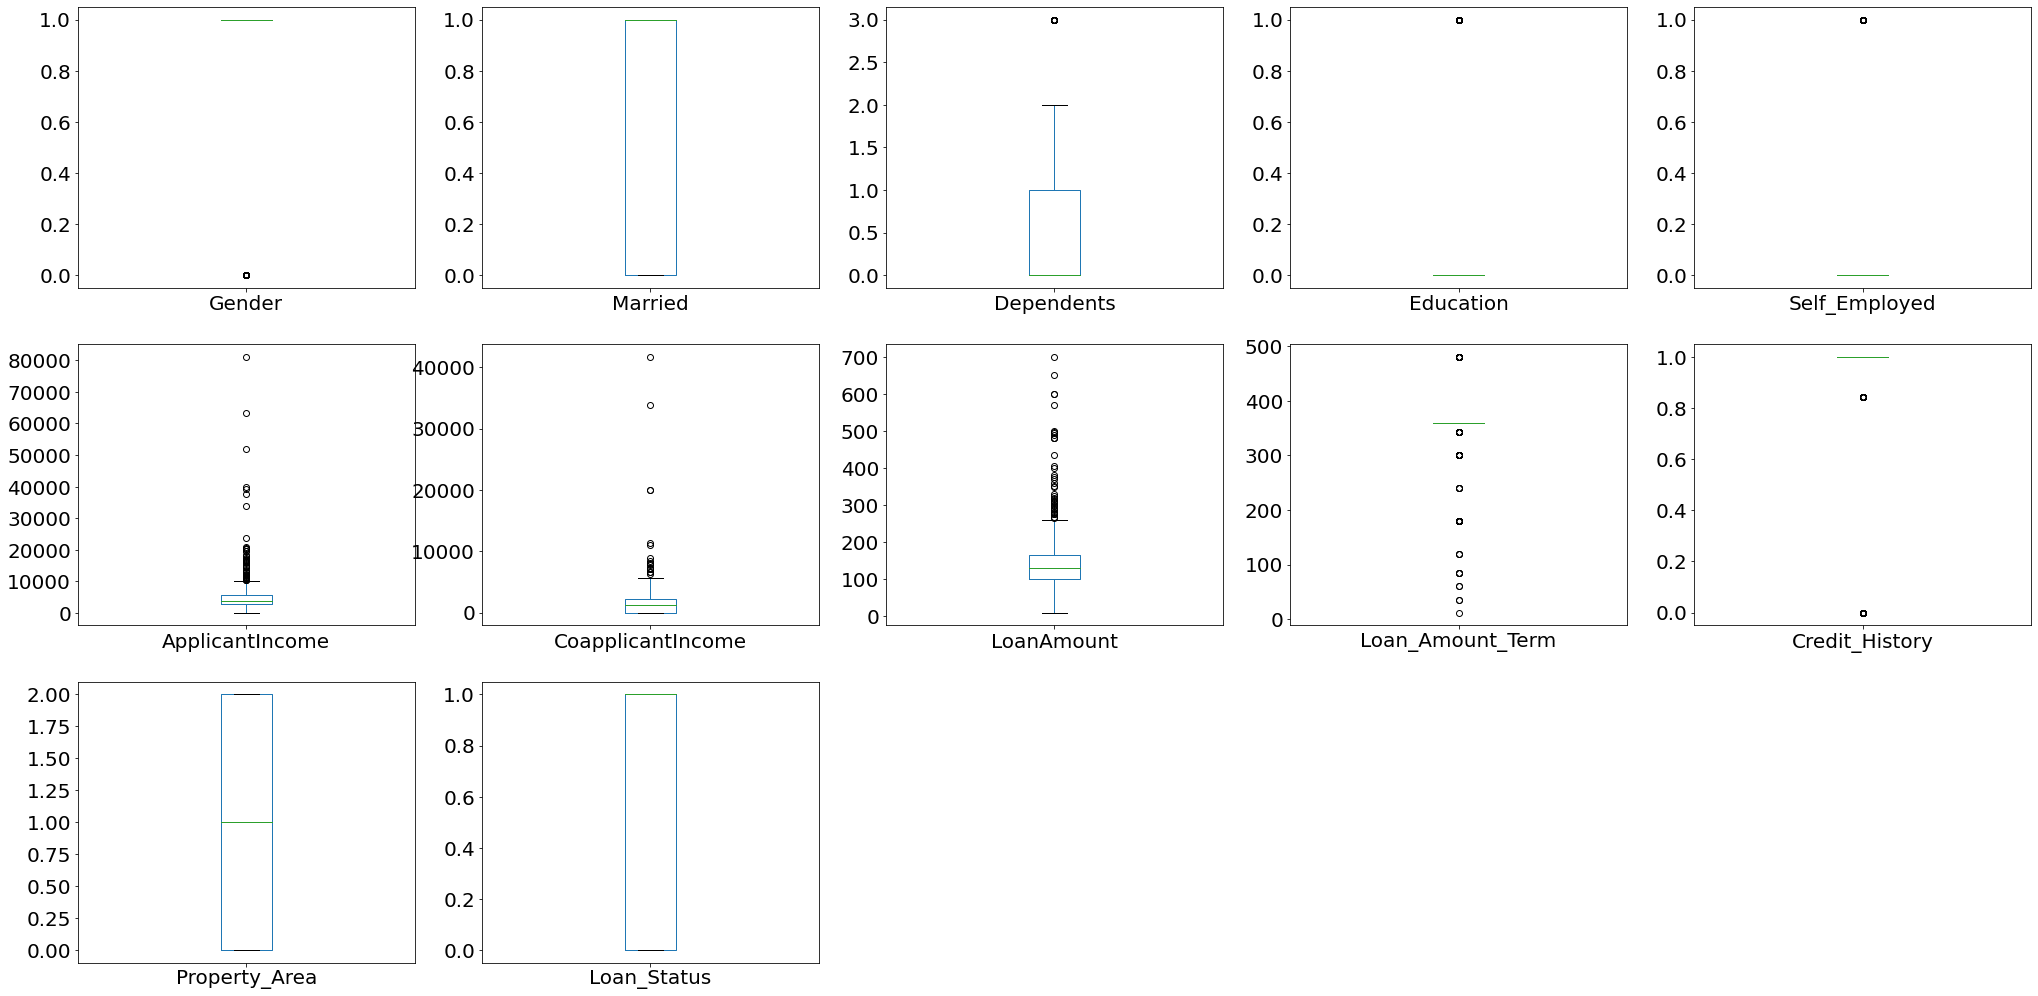

In [37]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
loan.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

the continous feature 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History' shows outliers, so we will use zscore method to remove these outliers

 lets use z score to remove outliers.z score represent the number of  standard deviation with which value of observation differ than mean value

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(loan))
print(z)

[[0.47234264 1.37208932 0.73780632 ... 0.45164045 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.45164045 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.45164045 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.45164045 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.45164045 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.41044061 0.04760721 1.48253724]]


In [39]:
threshold=3  # here we set theshold is equal 3
print(np.where(z<3))
print(loan.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(614, 12)


In [40]:
loan_1=loan[(z<3).all(axis=1)]  # here we eliminate all those data which above threshold 3, this is out standard value

In [41]:
loan_1.shape

(577, 12)

In [42]:
577/614


0.9397394136807817

now shape of data frame is 577 rows with 12 columns we lost almost 6 to7 percent of data so we will not reduce it more

# Skewness removal

here we prefer log1p transformation on continous data only, constant term 'c' is taken as 3, which is important to deal with zero values in dataset

In [43]:
c=3
loan_1['ApplicantIncome']=loan_1['ApplicantIncome'].apply(lambda x: np.log1p(x**c))
loan_1['CoapplicantIncome']=loan_1['CoapplicantIncome'].apply(lambda x: np.log1p(x**c))
loan_1['LoanAmount']=loan_1['LoanAmount'].apply(lambda x: np.log1p(x**c))
loan_1['Loan_Amount_Term']=loan_1['Loan_Amount_Term'].apply(lambda x: np.log1p(x**c))

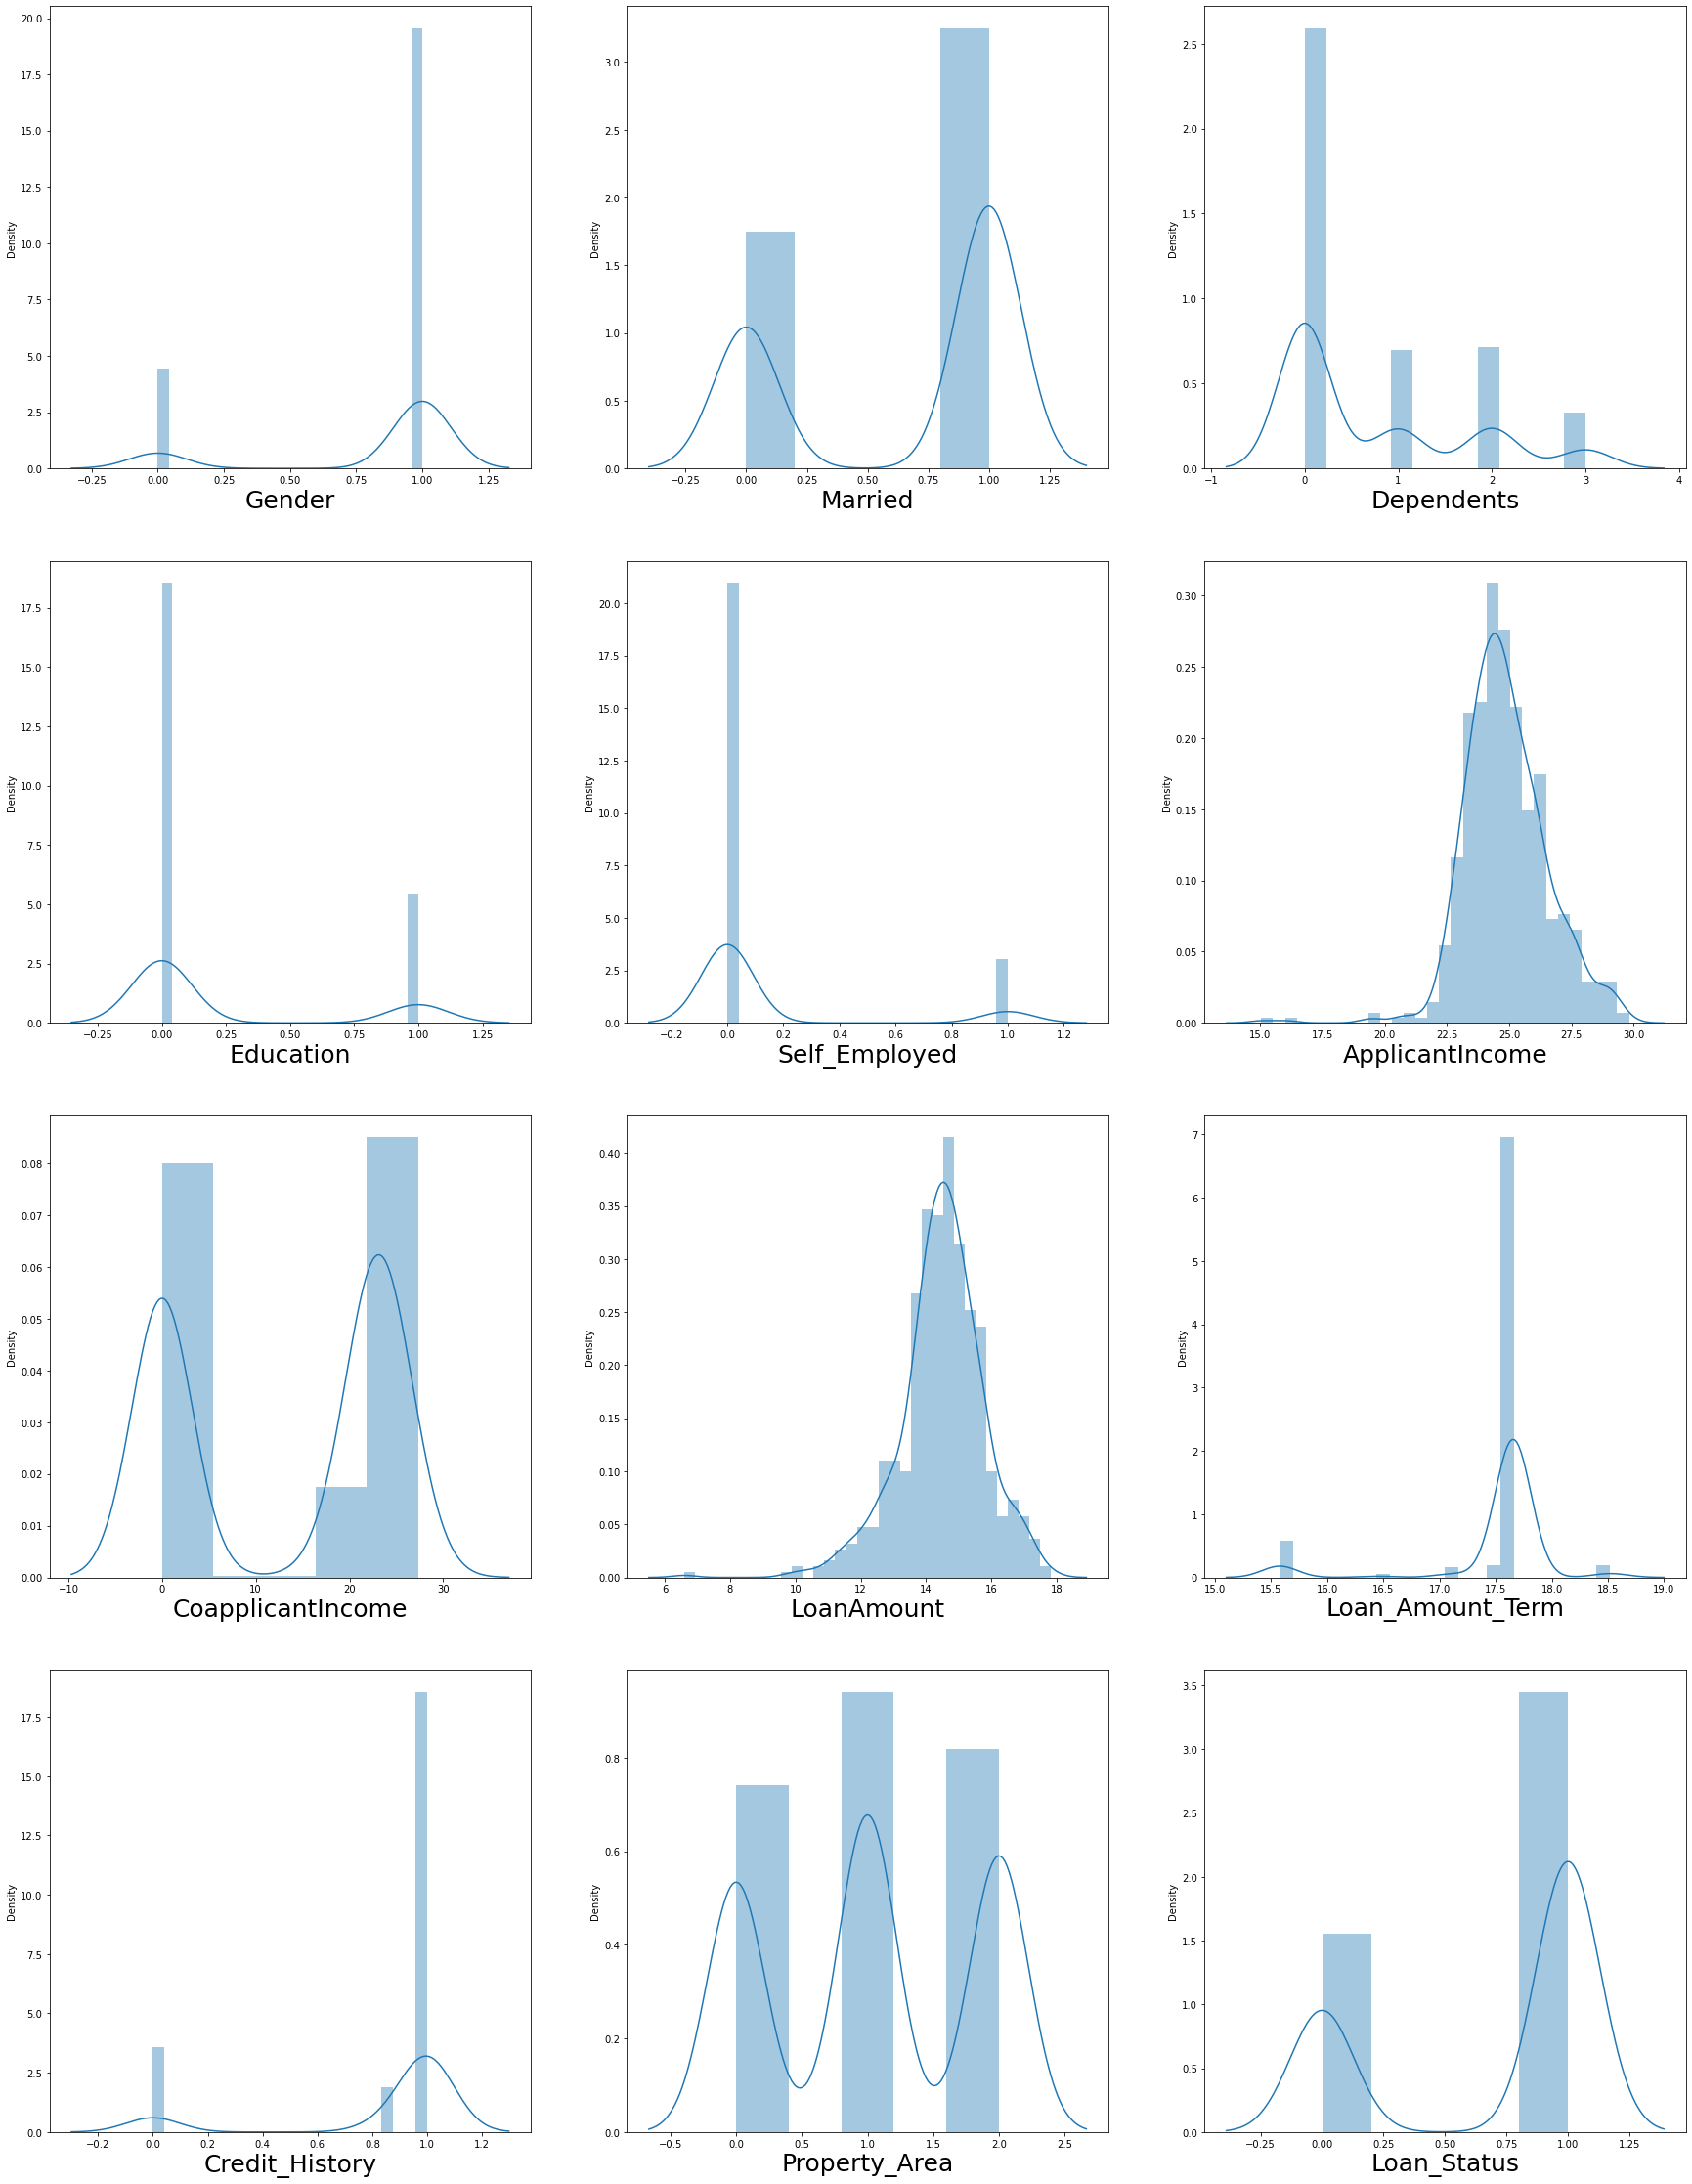

In [44]:
plt.figure(figsize=(30,40))# 30 represnt row dimension and 40 represents column dimension
plotnumber=1 # initially plotnumber is set to1
for column in loan_1:  # pass every column in for loop
    if plotnumber<=12:   # maximum value for plotnumber is set to 15, generallay it is equal to number of columns in dataframe
        plt.subplot(4,3,plotnumber)  # we draw,subplot in 3 rows and 3 columns
        sns.distplot(loan_1[column]) # draw distplot for each column
        plt.xlabel(column,fontsize=25)  # assign label to x axis which is column name
    plotnumber+=1 # increment the plotnumber after every iteration
plt.show()#

Gender                  AxesSubplot(0.125,0.749828;0.133621x0.130172)
Married              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Dependents            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Self_Employed        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
ApplicantIncome         AxesSubplot(0.125,0.593621;0.133621x0.130172)
CoapplicantIncome    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
LoanAmount            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Loan_Amount_Term     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Credit_History       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Property_Area           AxesSubplot(0.125,0.437414;0.133621x0.130172)
Loan_Status          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

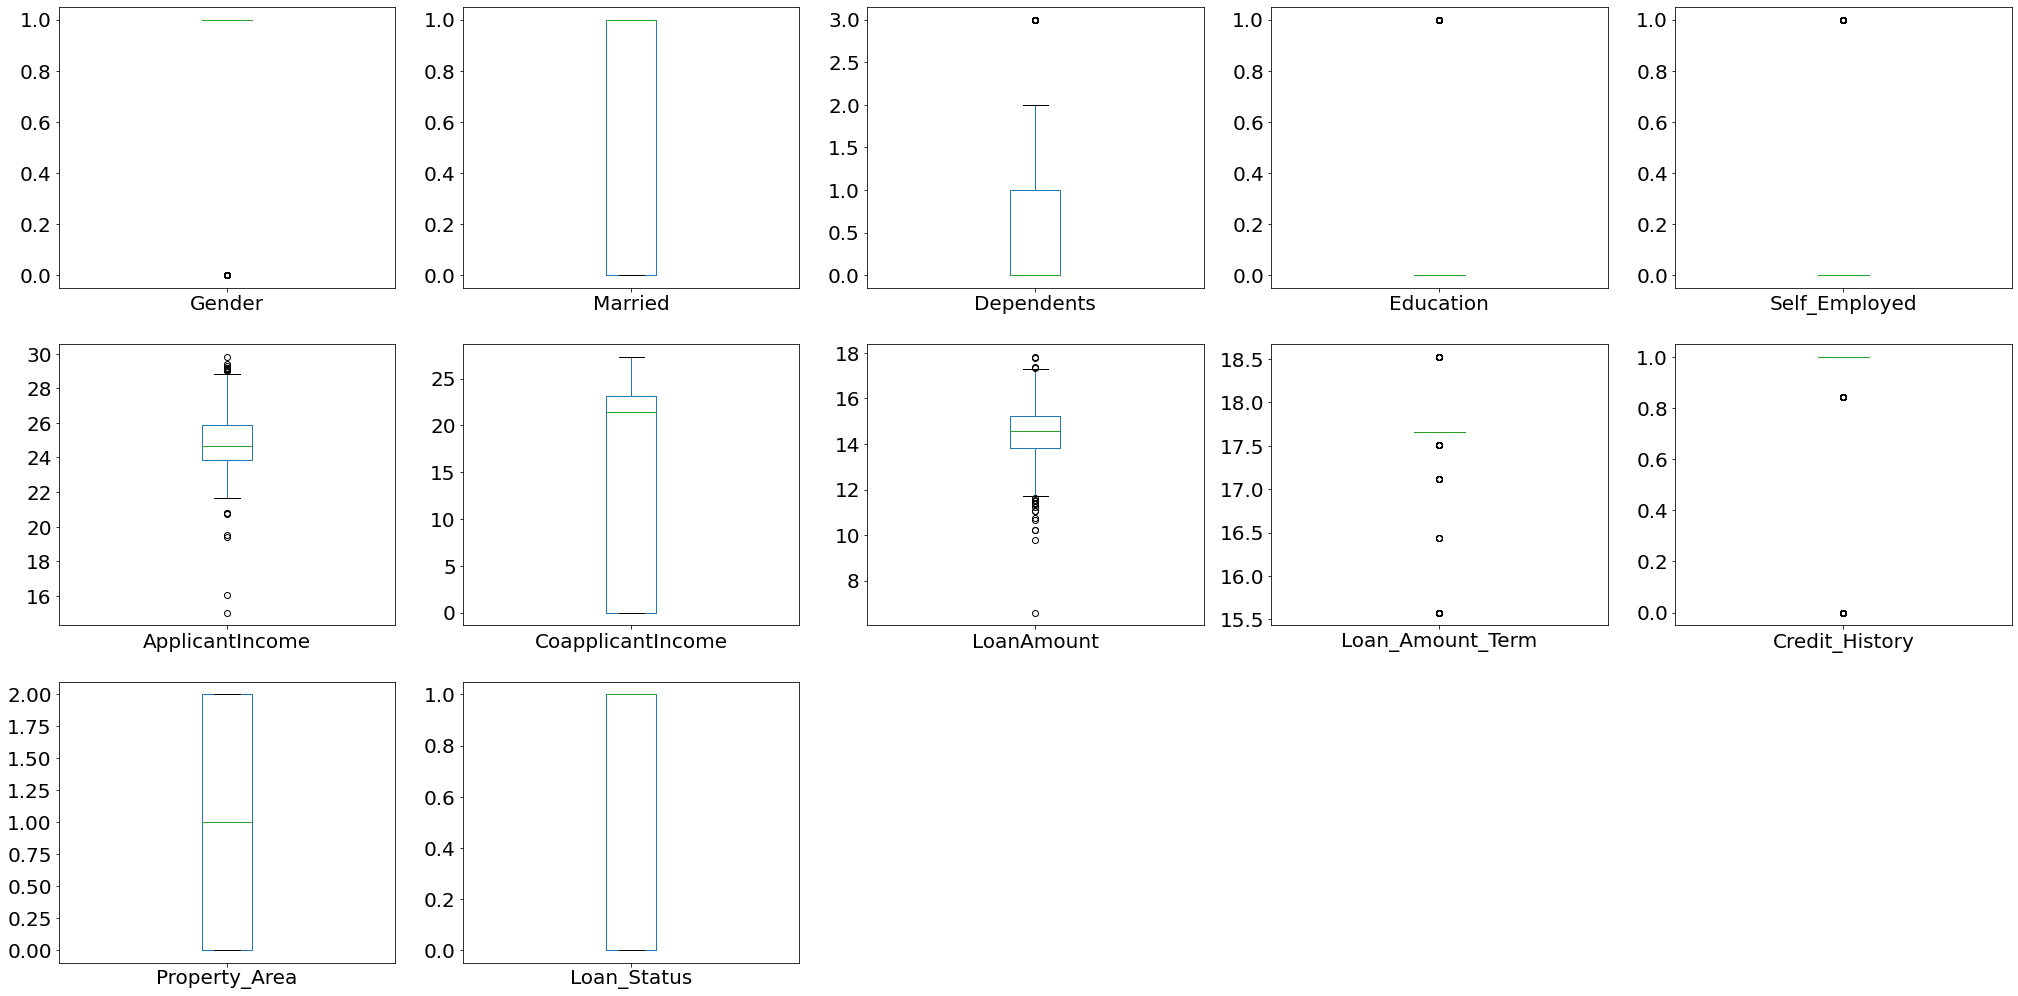

In [45]:
loan_1.plot(kind="box",subplots=True,figsize=(35,30),layout=(5,5),fontsize=20)

here we can see that some outliers are removed, and some skewness is also removed

In [46]:
loan_1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

here we cheked that, no null values are present in dataset

In [47]:
loan_1=loan_1.reset_index(drop=True)

reset index is used to set index again, because we removed outlier, so there index number can reset

In [48]:
loan_1.tail(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
557,1,0,3,0,1,27.431640,0.000000,17.030261,17.658312,1.0,1,1
558,1,1,0,0,0,24.774490,24.305033,14.867482,15.578871,1.0,0,1
559,1,1,0,0,1,29.063448,0.000000,16.682045,17.658312,1.0,2,1
560,1,0,0,1,0,24.754209,0.000000,14.101442,17.658312,1.0,0,1
561,1,1,2,1,1,26.284180,20.723266,15.693326,17.658312,1.0,0,0
562,1,0,0,0,0,24.006074,0.000000,13.432012,17.658312,0.0,1,0
563,1,1,0,0,1,27.619901,0.000000,15.578871,17.658312,1.0,0,1
564,1,1,2,0,0,25.986477,0.000000,15.772486,17.658312,1.0,2,1
565,1,1,0,1,0,23.911185,23.803540,15.130276,17.658312,1.0,0,1
566,1,1,3,0,0,25.946243,0.000000,14.556091,17.658312,1.0,2,1


# Multivariate Analysis

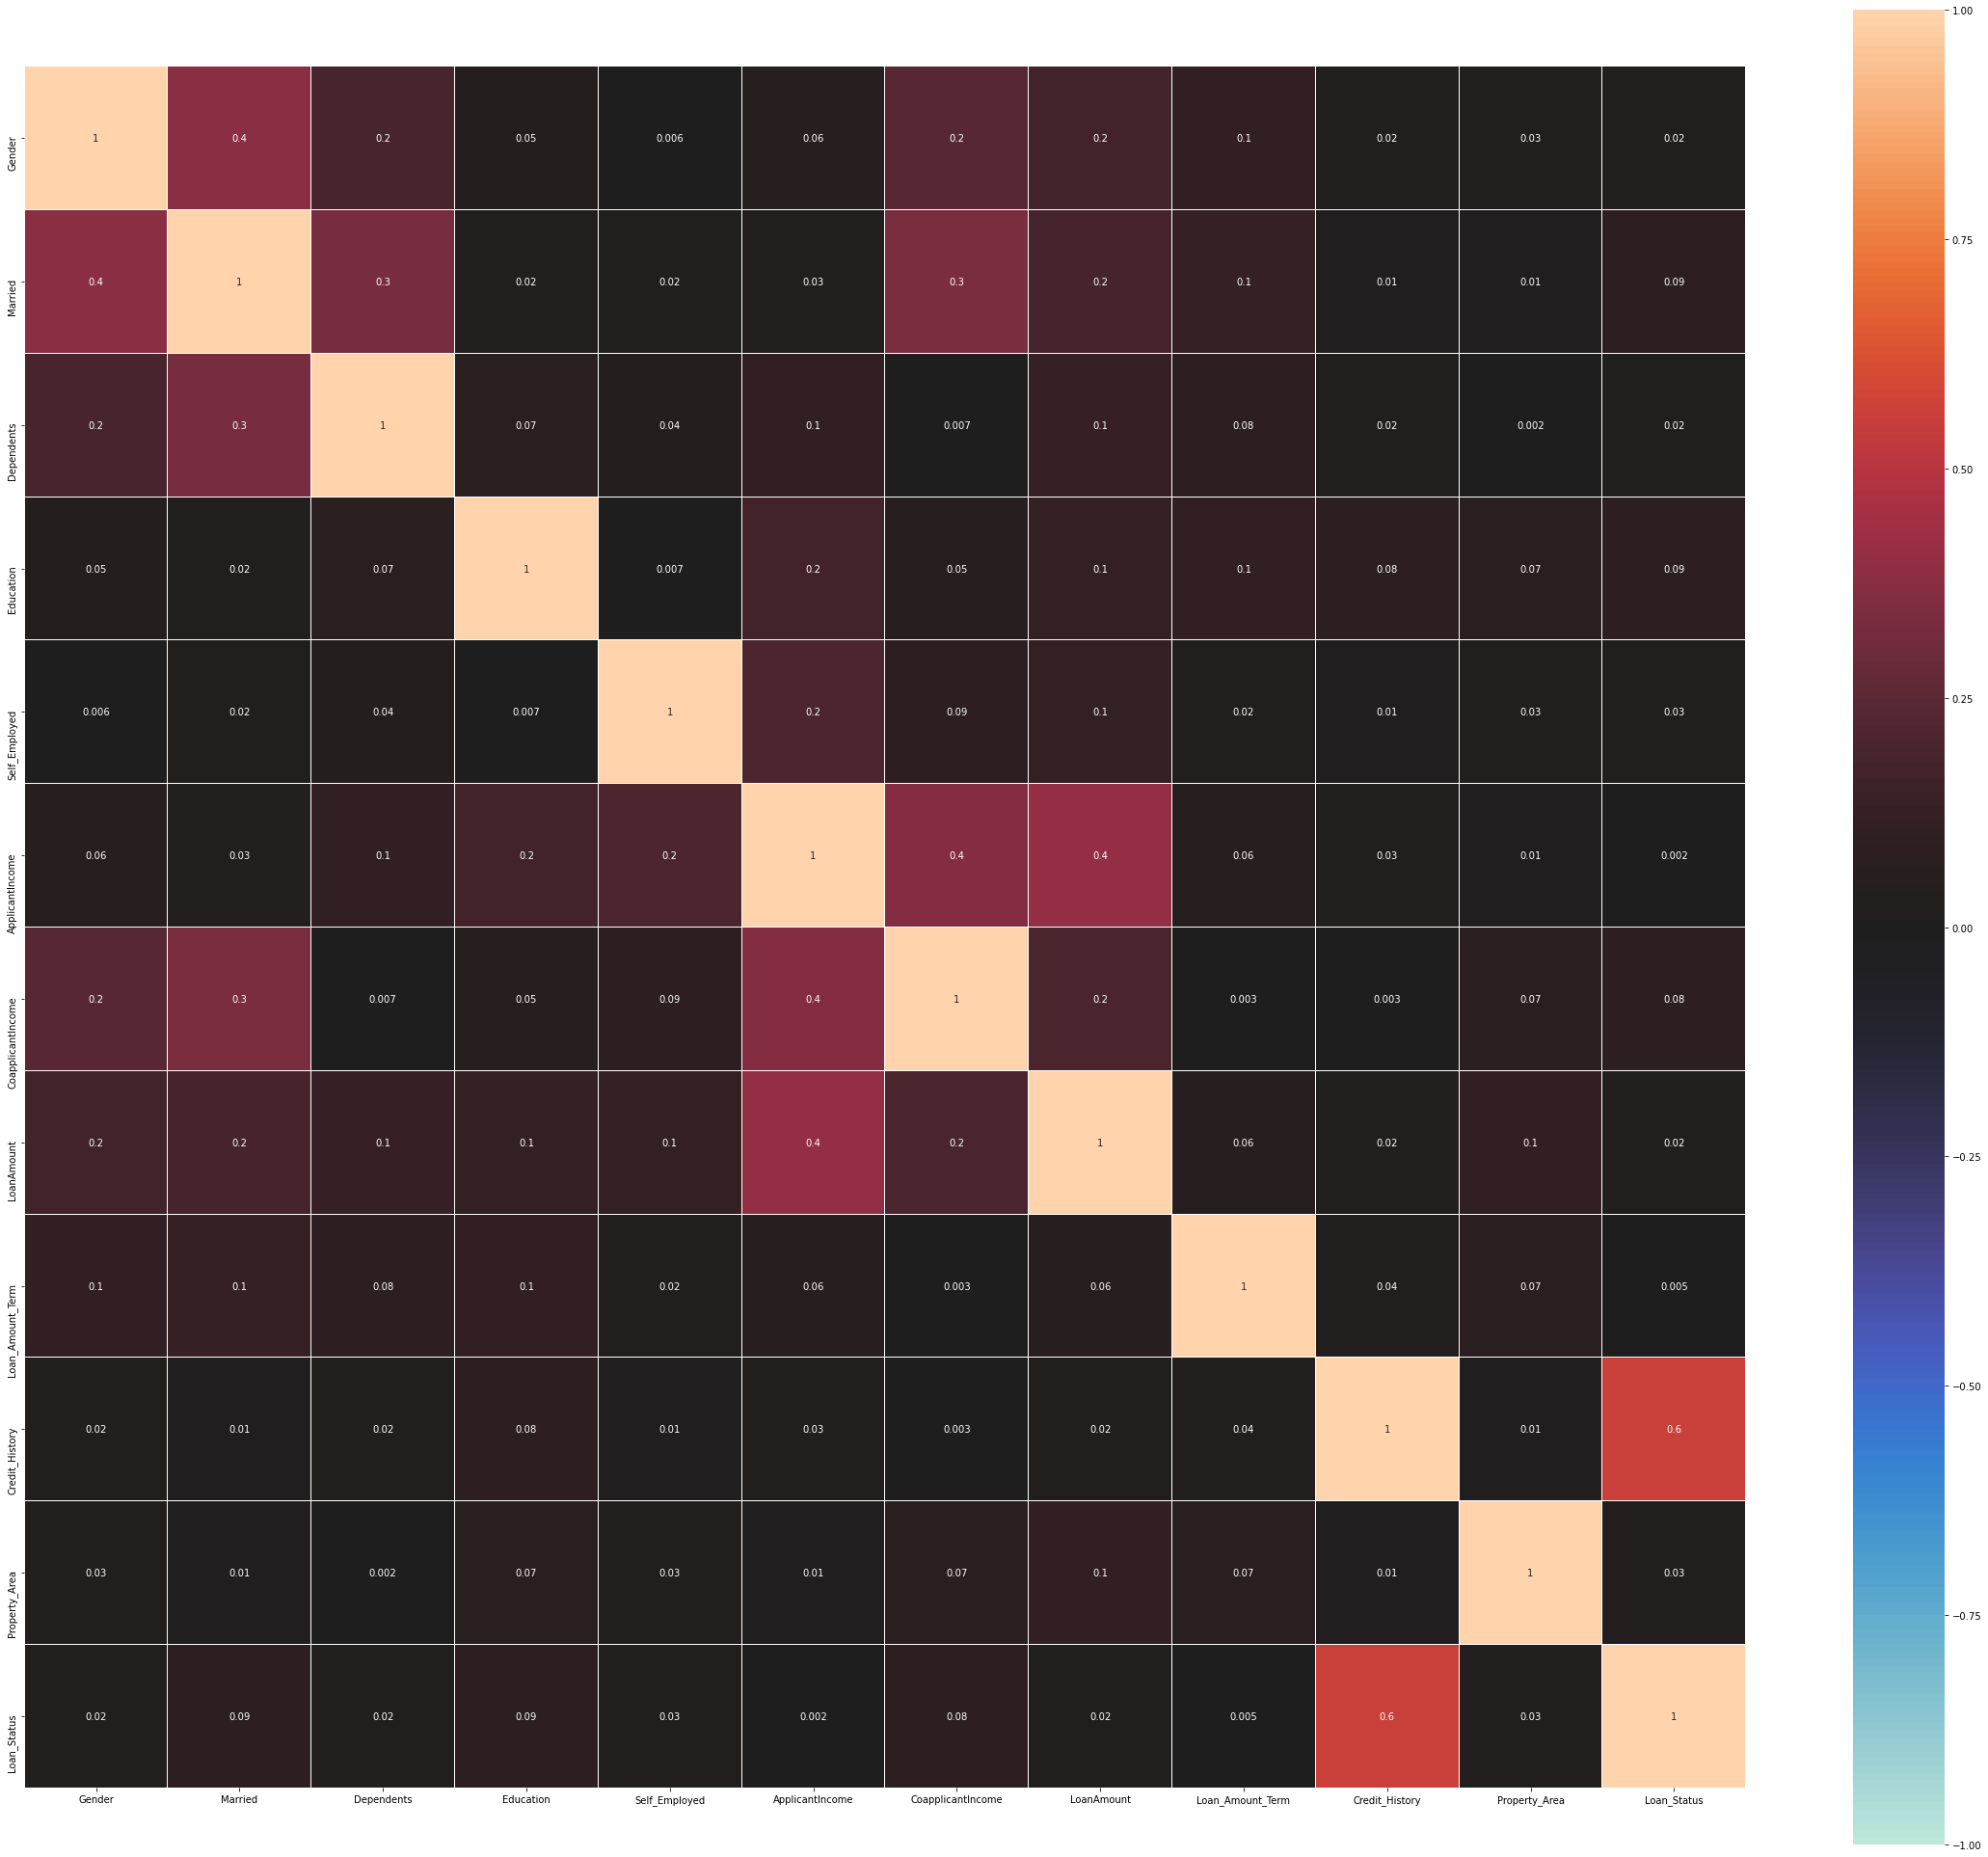

In [49]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=loan_1.corr().abs()
plt.figure(figsize=(40,35))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, we can not compare correlation between categorical and continous data.

In [50]:
corr_matrix=df_corr.corr()   # here we get values of correlation in descending order
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.809462
Education           -0.056653
Property_Area       -0.165337
Married             -0.185232
Self_Employed       -0.191222
CoapplicantIncome   -0.193271
Loan_Amount_Term    -0.230432
Dependents          -0.248925
Gender              -0.271598
ApplicantIncome     -0.321759
LoanAmount          -0.328991
Name: Loan_Status, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable

In [51]:
df_corr.skew()

Gender               2.580137
Married              2.178025
Dependents           2.848002
Education            3.308432
Self_Employed        3.209698
ApplicantIncome      2.293184
CoapplicantIncome    2.367247
LoanAmount           2.687135
Loan_Amount_Term     3.340790
Credit_History       2.430125
Property_Area        3.384264
Loan_Status          2.408781
dtype: float64

In [52]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    float64
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 38.4 KB


now new dataset has 577 rows with no null values

In [53]:
loan_2=loan_1.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)

loan_2 dataset has only numerical columns only, we drop categorical columns for further operation

In [54]:
loan_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,26.022078,0.000000,14.959277,17.658312,1.0
1,25.290327,21.955619,14.556091,17.658312,1.0
2,24.019103,0.000000,12.568968,17.658312,1.0
3,23.570120,23.296707,14.362476,17.658312,1.0
4,26.098544,0.000000,14.846280,17.658312,1.0


In [55]:
loan_3=loan_1.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'],axis=1)

In [56]:
loan_3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


loan_3 has only categorical columns only , we drop numerical columns

label "Loan_Status" has no imbalance, so no need of SMOTE method

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(loan_2)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [58]:

loan_4=pd.DataFrame(x_scaled,columns = loan_2.columns)# here converted array into dataframe
loan_4.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.688804,-1.127420,0.369887,0.265896,0.456461
1,0.249126,0.780653,0.056981,0.265896,0.456461
2,-0.514699,-1.127420,-1.485192,0.265896,0.456461
3,-0.784474,0.897201,-0.093281,0.265896,0.456461
4,0.734749,-1.127420,0.282191,0.265896,0.456461


In [59]:
loan_4.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [60]:
loan_4.tail(15)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
562,-0.522528,-1.127420,-0.815398,0.265896,-2.372488
563,1.648868,-1.127420,0.850742,0.265896,0.456461
564,0.667413,-1.127420,1.001004,0.265896,0.456461
565,-0.579543,0.941248,0.502595,0.265896,0.456461
566,0.643238,-1.127420,0.056981,0.265896,0.456461
567,-0.148393,1.053901,0.744895,0.265896,0.456461
568,-0.916932,1.021612,0.369887,-3.411366,0.456461
569,-0.289084,0.912447,0.758392,0.265896,0.456461
570,-0.001999,0.763319,0.532445,0.265896,0.456461
571,-0.380428,0.847669,-0.338586,0.265896,0.456461


In [61]:
loan_4.reset_index(drop=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.688804,-1.127420,0.369887,0.265896,0.456461
1,0.249126,0.780653,0.056981,0.265896,0.456461
2,-0.514699,-1.127420,-1.485192,0.265896,0.456461
3,-0.784474,0.897201,-0.093281,0.265896,0.456461
4,0.734749,-1.127420,0.282191,0.265896,0.456461
5,0.550495,1.047457,1.768752,0.265896,0.456461
6,-0.967970,0.782032,-0.637194,0.265896,0.456461
7,-0.493197,0.912864,0.547228,0.265896,-2.372488
8,0.006570,0.783746,0.690110,0.265896,0.456461
9,-0.398364,0.580562,-1.348197,0.265896,0.456461


In [62]:
loan_4.shape

(577, 5)

In [63]:
loan_3.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [64]:
loan_3.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
5,1,1,2,0,1,2,1
6,1,1,0,1,0,2,1
7,1,1,3,0,0,1,0
8,1,1,2,0,0,2,1
9,1,1,2,0,0,2,1


In [65]:
loan_3.shape

(577, 7)

In [66]:
loan_3.tail(70)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
507,1,0,2,0,0,1,1
508,1,1,0,1,0,0,0
509,1,1,3,0,0,0,1
510,0,1,1,0,0,1,1
511,0,0,0,0,0,1,0
512,0,0,1,0,0,1,1
513,1,1,1,1,0,2,1
514,0,1,0,1,0,1,1
515,1,1,0,0,0,0,1
516,1,0,0,0,0,0,1


In [67]:
loan_new = pd.concat([loan_4,loan_3],axis=1)  # here concate both dataframe after scaling

now we concated both continous dataframe and categorical data frame.

In [68]:
loan_new.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.688804,-1.127420,0.369887,0.265896,0.456461,1,0,0,0,0,2,1
1,0.249126,0.780653,0.056981,0.265896,0.456461,1,1,1,0,0,0,0
2,-0.514699,-1.127420,-1.485192,0.265896,0.456461,1,1,0,0,1,2,1
3,-0.784474,0.897201,-0.093281,0.265896,0.456461,1,1,0,1,0,2,1
4,0.734749,-1.127420,0.282191,0.265896,0.456461,1,0,0,0,0,2,1


In [69]:
loan_new.shape

(577, 12)

In [70]:
loan_new.tail(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
567,-0.148393,1.053901,0.744895,0.265896,0.456461,1,0,0,0,0,0,1
568,-0.916932,1.021612,0.369887,-3.411366,0.456461,1,1,0,1,0,2,0
569,-0.289084,0.912447,0.758392,0.265896,0.456461,1,1,1,0,0,1,1
570,-0.001999,0.763319,0.532445,0.265896,0.456461,1,1,2,1,0,0,1
571,-0.380428,0.847669,-0.338586,0.265896,0.456461,1,1,0,0,0,0,1
572,-0.575810,-1.127420,-1.315172,0.265896,0.456461,0,0,0,0,0,0,1
573,0.051015,-1.127420,-2.651112,-3.411366,0.456461,1,1,3,0,0,0,1
574,1.269468,0.301480,1.643354,0.265896,0.456461,1,1,1,0,0,2,1
575,1.156821,-1.127420,0.939569,0.265896,0.456461,1,1,2,0,0,2,1
576,0.249126,-1.127420,0.146197,0.265896,-2.372488,0,0,0,0,1,1,0


In [71]:
loan_new.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
x=loan_new.drop(columns=['Loan_Status'],axis=1)
y=loan_new['Loan_Status']

x has only feature and y contains only labels

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance



In [74]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8 on Random state 42


Whatever number we get as a random state is used by train test split in below code



In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy*100)

Log_reg_accuracy 84.13793103448276


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [78]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy*100)

DTC_accuracy 77.93103448275862


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [79]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy*100)

KNC_accuracy 82.06896551724138


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors



In [80]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy*100)

svc_accuracy 84.13793103448276


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [81]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy*100)

RFC_accuracy 84.82758620689656


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [82]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy*100)

GBC_accuracy 82.06896551724138


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [83]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy*100)

XBC_accuracy 77.93103448275862


In [84]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [85]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score*100

81.80809595202398

In [86]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score*100

69.84257871064467

In [87]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score*100

78.16041979010494

In [88]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score*100

81.63418290854572

In [89]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score*100

80.59370314842577

In [90]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score*100

79.03898050974513

In [91]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score*100

77.2983508245877

In [92]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 2.3298350824587857
DTC_diff 8.088455772113946
KNC_diff 3.908545727136442
svc_diff 2.5037481259370367
RFC_diff 4.233883058470781
GBC_diff 3.0299850074962507
XBC_diff 0.6326836581709188


In above line, we take difference of accuracy score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [93]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.8413793103448276
Log_reg_cv_score 0.8180809595202397
Logistic_regression_diff 2.3298350824587857
-------------------------------------------------------------------------------------------
DTC_accuracy 0.7793103448275862
DTC_CV_score 0.6984257871064468
DTC_diff 8.088455772113946
-------------------------------------------------------------------------------------------
KNC_accuracy 0.8206896551724138
KNC_CV_score 0.7816041979010494
KNC_diff 3.908545727136442
-------------------------------------------------------------------------------------------
svc_accuracy 0.8413793103448276
svc_CV_score 0.8163418290854573
svc_diff 2.5037481259370367
-------------------------------------------------------------------------------------------
RFC_accuracy 0.8482758620689655
RFC_CV_score 0.8059370314842578
RFC_diff 4.233883058470781
-------------------------------------------------------------------------------------------
GBC_accuracy 0.8206896551724138
GBC_CV_score 0.790389805097

Here we get Accuracy ,CV score and Difference between them,for logistics regression,difference is nearly same as compared to other algorithm,but if we checked accuracy and cv score of each model, we can see that for logistics regression both values are large so we will prefer hyperparameter tuning for logistic regression


In [94]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [95]:
params={'penalty':['l1','l2','elasticnet','none'],
       'C':[0.0001,0.001,0.01,0.1,1.0],
       'max_iter':[100,200,300,400],
       'multi_class':['auto','ovr','multinomial'],
       'class_weight':['dict','balanced']}

In [96]:
Grid_log=GridSearchCV(LogisticRegression(),param_grid=params,cv=5)
Grid_log.fit(x_train,y_train)
Grid_log.best_params_

{'C': 0.01,
 'class_weight': 'dict',
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2'}

In [97]:
Final_log_reg=LogisticRegression(C=0.01,class_weight='dict',max_iter=100,multi_class='auto',penalty='l2')
Final_log_reg.fit(x_train,y_train)
final_pred=Final_log_reg.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

84.13793103448276


In [98]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[ 20,  22],
       [  1, 102]], dtype=int64)

confusion matrix give us matrix of TN,TP,FP and FN

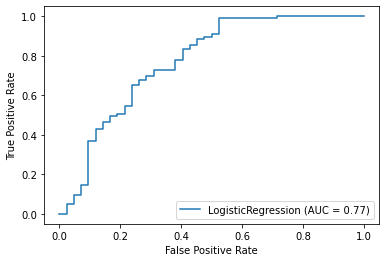

In [99]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_log_reg,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Logistic Regression ROC curve cover almost more than 77 % area under it.

In [100]:
import joblib
joblib.dump(Final_log_reg,"Loan Prediction.pkl")

['Loan Prediction.pkl']

here we saved model sucessfully